In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Optimizing Ticket Price

Procedures:
1. Selecting Data
* Select Target
* Select Predictors
2. Cleanse
* Pipeline


* Selecting Target
* OneHot Encoding (Characteristic Variables)
* Imputation (Finding and Filling Missing Values)
* Cross Validation
Data Leakage
3. Analysis & Visualization


In [ ]:
#Selecting Data
airline_data = pd.read_csv('/kaggle/input/us-airline-flight-routes-and-fares-1993-2024/US Airline Flight Routes and Fares 1993-2024.csv')
airline_data.head()


In [ ]:
airline_data.columns

In [ ]:
#Importing Packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

#Selecting Target
y = airline_data.fare

#Selecting Predictors
airline_features= ['airport_1', 'airport_2', 'nsmiles', 'city1', 'city2' ]
X = airline_data[airline_features]

#Splitting Training & Validation Data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size = .8, test_size = .2, random_state=0)

#Selecting categorical columns with relatively low cardinality
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and
                    X_train_full[cname].dtype=="object"]
#Selecting numerical columns 
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
#Preprocessing with pipeline
#Numerical data
numerical_transformer = SimpleImputer(strategy = 'constant')


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'most frequent'),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore')))
])

preprocessor = ColumnTransformer(
    transformers= [
        ('num', nuemrical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

In [ ]:
model = RandomForestRegressor(n_estimators = 10, random_state=0)
my_pipeline = Pipeline(steps= [
    ('preprocessor', preprocessor),
    ('model', model)
])

my_pipeline.fit(X_train, y_train)
preds= my_pipeline.predict(X_valid)

In [ ]:
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

In [ ]:
cv_score = -1* cross_val_score(my_pipeline, X, y, cv = 5, scoring= 'neg_mean_absolute_error')
cv_score.mean()


In [38]:
def get_score(n_estimators):
    my_pipeline = Pipeline(steps= [
    ('preprocessor', preprocessor),
    ('model', model)
        ])
    cv_score = -1* cross_val_score(my_pipeline, X, y, cv = 5, scoring= 'neg_mean_absolute_error')
    return cv_score.mean()
    

In [46]:
#Test Different parameter values

result= {}
for i in range(0,5):
    result[50*i] = get_score(50*i)

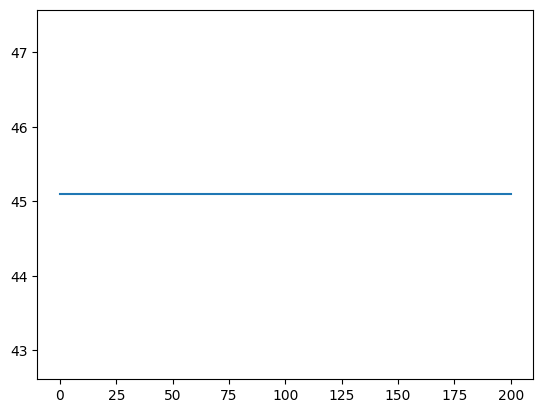

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(result.keys()), list(result.values()))
plt.show()

In [48]:
result

{0: 45.09147862687732,
 50: 45.09147862687732,
 100: 45.09147862687732,
 150: 45.09147862687732,
 200: 45.09147862687732}